In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42942_Z')

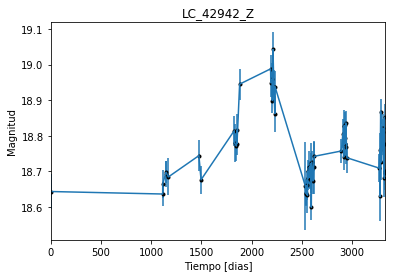

In [2]:
data = np.genfromtxt('LC_42942_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42942_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

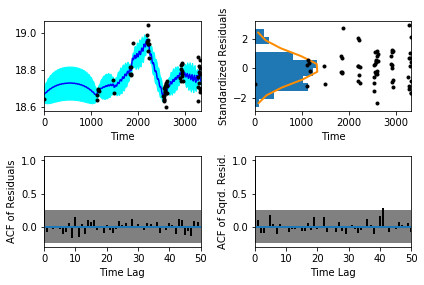

In [5]:
sample.assess_fit()

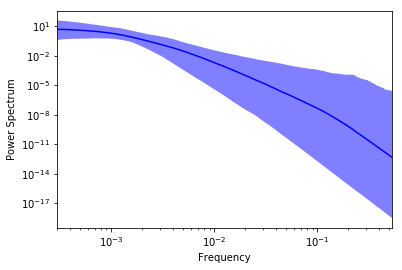

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42942_Z')

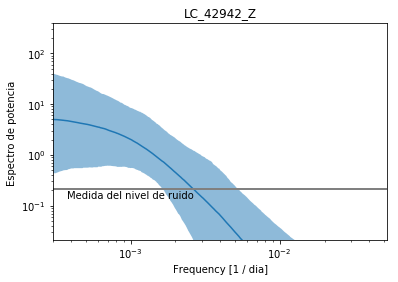

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42942_Z')

Text(0.5,1,'Prediccion , valor esperado LC_42942_Z')

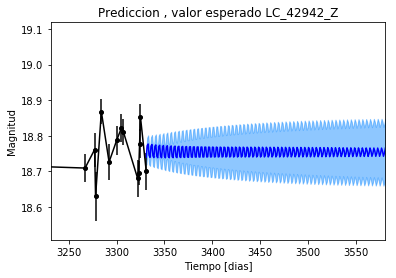

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42942_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42942_Z')

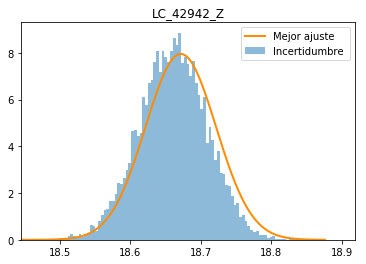

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42942_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_Z')

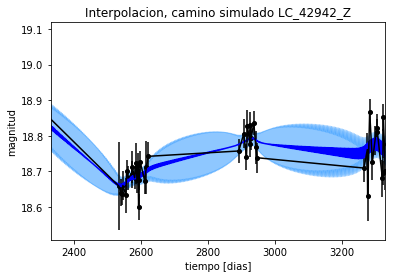

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_Z')

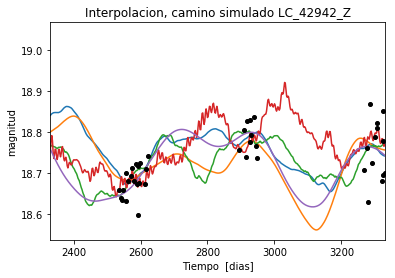

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 624.196799237
Median: 0.00584610497116
Standard deviation: 0.178273291724
68% credibility interval: [ 0.00064083  0.12144672]
95% credibility interval: [  3.22635181e-04   7.23644812e-01]
99% credibility interval: [  3.09284017e-04   9.38740596e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 891.454930819
Median: 0.00148877831833
Standard deviation: 0.0713843619372
68% credibility interval: [ 0.00046628  0.01723025]
95% credibility interval: [ 0.00031437  0.21185648]
99% credibility interval: [  3.05119511e-04   5.08180230e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 189.802493974
Median: 0.0212042986927
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 938.625283996
Median: 119.769265968
Standard deviation: 1.60993143342
68% credibility interval: [ 117.94255861  120.8979593 ]
95% credibility interval: [ 115.58502549  121.75295863]
99% credibility interval: [ 113.54154784  122.37571865]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 394.435007773
Median: 0.531517870433
Standard deviation: 2.16011858237
68% credibility interval: [ 0.05102454  3.82265358]
95% credibility interval: [ 0.01427453  7.07467213]
99% credibility interval: [ 0.00973018  9.66953782]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 721.836324596
Median: 0.247466385466
Standard deviation: 8.98500599476
68% credibility interval: [ 0.00961866  6.23558976]
95% credibility interval: [  4.80233732e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1371.48694665
Median: 1.21056214998e-23
Standard deviation: 5.00555362422e+49
68% credibility interval: [  1.38174658e-56   4.72134838e-02]
95% credibility interval: [  4.38559859e-116   4.25830568e+032]
99% credibility interval: [  9.69402553e-126   2.73256766e+044]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3409.29448891
Median: 18.7450827804
Standard deviation: 0.0601474383381
68% credibility interval: [ 18.6962975   18.78922747]
95% credibility interval: [ 18.61401367  18.84956251]
99% credibility interval: [ 18.55300296  18.93030998]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 453.368637564
Median: 0.00260665177603
Standard deviation: 0.243049388406
68% credibility interval: [ 0.          0.31617347]
95% credibility interval: [ 0.          0.90234835]
99% credibility interval: [ 0.          1.03105652]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 453.368637564
Median: 0.00260665177603
Standard deviation: 0.243049388406
68% credibility interval: [ 0.          0.31617347]
95% credibility interval: [ 0.          0.90234835]
99% credibility interval: [ 0.          1.03105652]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1240.60496057
Median: 0.0
Standard deviation: 0.000593306860485
68% 

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 938.625283996
Median: 119.769265968
Standard deviation: 1.60993143342
68% credibility interval: [ 117.94255861  120.8979593 ]
95% credibility interval: [ 115.58502549  121.75295863]
99% credibility interval: [ 113.54154784  122.37571865]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 5013.16506972
Median: 0.0124785191281
Standard deviation: 0.0218376030433
68% credibility interval: [ 0.00702504  0.02464707]
95% credibility interval: [ 0.00447605  0.06310174]
99% credibility interval: [ 0.00333468  0.11701987]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1184.10723983
Median: 1.16943901465
Standard deviation: 0.176464855407
68% credibility interval: [ 1.0139766   1.36096586]
95% credibility interval: [ 0.88379796  1.57107141]
99% credibility interval: [ 0.79808439  1.71149902]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 943.177498294
Median: 3.95844588943e-05
Standard deviation: 0.0974592433716
68% credibility interval: [  3.37939848e-07   3.57420231e-03]
95% credibility interval: [  3.40908259e-38   1.03299611e-01]
99% credibility interval: [  1.10756786e-49   5.89486153e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 624.196799237
Median: (-0.036732160859-0.279055286023j)
Standard deviation: 1.89388141894
68% credibility interval: [-0.76307226-0.97133241j -0.00402644-0.27067563j]
95% credibility interval: [ -4.54679445e+00+0.j          -2.02717663e-03-0.06333175j]
99% credibility interval: [ -5.89828112e+00+0.j        -1.94328879e-03-0.000724j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 891.454930819
Median: (-0.00935427005539+0.597199181892j)
Standard deviation: 1.5916281011
68% credibility interval: [-0.10826086+3.29763171j -0.00292969+3.62203886j]
95% credibility interval: [-1.33113354 +2.14180838e+00j -0.00197527 +1.01535409e-03j]
99% credibility interval: [ -3.19299055e+00+2.19930686j  -1.91712243e-03+0.j        ]
Posteri